In [4]:
from math import ceil
import numpy as np 
import cvxpy as cp 
import random
import matplotlib.pyplot as plt
from deepc import DeePC
from numpy import linalg
import pandas as pd

n = 30;
d = 10;
U_true = np.array([[-0.5613,0.7346],[-0.8269,-0.5173],[-0.0352,0.4391]])
U_ini = np.array([[-0.5062,0.7332],[-0.4828,-0.6772],[-0.7146,-0.0618]])
# U_ini = U_true 
print(U_true)
   

[[-0.5613  0.7346]
 [-0.8269 -0.5173]
 [-0.0352  0.4391]]


In [6]:
def grouse_update(U_Omega,v_obs,step_size):
    # Estimate weights: U_Omega = Delta_Omega*Ut
    w = np.linalg.pinv(U_Omega)@v_obs
    norm_w = np.linalg.norm(w)
    
    # Predict full vector:
    p = U_Omega@w
    norm_p = np.linalg.norm(p)
    
    # Compute residual:
    r = v_obs - U_Omega@w;  
    norm_r = np.linalg.norm(r)
    
    # Update subpace:
    sigma = norm_r*norm_w;
    q = step_size*sigma;
    U_update = U_Omega + ((np.cos(q)-1)*p/norm_p + np.sin(q)*r/norm_r)@np.transpose(w)/norm_w
    
    return U_update

===== START TUNING ======


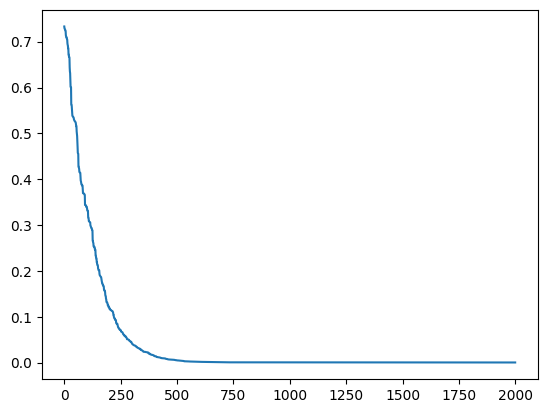

In [7]:
U_Omega = U_ini
step = 2000
step_size = 0.01
w = 0.0              
L_gap_log = np.zeros((1,step))
print('===== START TUNING ======')
for i in range(step):    
    alpha = np.random.normal(0, 1, size=(2, 1))
    beta = np.random.normal(0,w**2, size=(3, 1))
    v_Omega = U_true@alpha + beta
    U_new = grouse_update(U_Omega,v_Omega,step_size);
    U_Omega = U_new
    L_gap = np.linalg.norm(U_true@np.transpose(U_true)-U_new@np.transpose(U_new),2)
    L_gap_log[0,[i]] = L_gap
plt.plot(L_gap_log[0,:])
plt.show()


In [11]:
alpha

array([[-0.02047173],
       [ 0.35642255]])

In [19]:
alpha

array([[-0.02047173],
       [ 0.35642255]])

In [26]:
v = U_true@alpha
v_unit = v/np.linalg.norm(v,2)
print(v_unit)
print(np.linalg.norm(v_unit,2))

[[ 0.7655587 ]
 [-0.46902109]
 [ 0.44038516]]
1.0


In [27]:
np.linalg.svd((v_unit).T@U_true)[1]

array([1.00002448])

In [9]:
np.linalg.norm(U_true@np.transpose(U_true)-U_new@np.transpose(U_new),2)

9.582502102744407e-05

In [10]:
U_ini@np.transpose(U_ini)

array([[ 0.79382068, -0.25212968,  0.31641876],
       [-0.25212968,  0.69169568,  0.38685984],
       [ 0.31641876,  0.38685984,  0.5144724 ]])

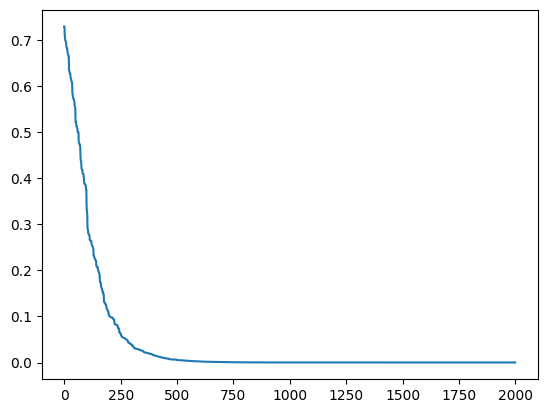